In [30]:
import pandas as pd
import numpy as np
import copy
import math
import matplotlib.pyplot as plt
import csv
from scipy.spatial.distance import cdist
from plotDecBoundaries import plotDecBoundaries
  

In [31]:
df = pd.read_csv('ee559_dataset/dataset1_train.csv')

In [32]:
df.head()

,X-axis,Y-axis,Class
0,-2.551392,-0.445095,2.0
1,2.509011,-1.430325,1.0
2,0.754025,0.862413,1.0
3,-0.534698,-1.150850,2.0
4,0.489164,2.747746,1.0


In [33]:
df.shape

(100, 3)

In [34]:
df['Class'].value_counts()

Class
2.0    50
1.0    50
Name: count, dtype: int64

In [35]:
def openFile(dataset):
    #Open the csv file and store it in a list
    with open(dataset,"r") as Feat_Train: 
        Feat_Train_Reader = csv.reader(Feat_Train, delimiter=',')
        FeatureList = []
        for row in Feat_Train_Reader:
            if len (row) != 0:
                FeatureList = FeatureList +[row] 
    Feat_Train.close()
    return FeatureList

In [36]:
#Making a copy of the training data list with just the training data and no labels 
def just_data(FeatureList):
    Data = []
    for row in FeatureList: 
        Data.append((row[:-1]))
    #print(Data)
    
    result1 = np.array(Data[1:]).astype("float") 
    return result1

def class_labels(FeatureList):
    #Make a list containing the class labels 
    Class = []
    for row in FeatureList: 
        Class.append((row[-1]))
    print(Class)
    
    result2 = np.array(Class[1:]).astype("float") 
    return result2


In [37]:
def calculate_mean(FeatureList):
#Calculate the mean 
    FeatureList1 = []
    FeatureList2 = []

    #Divide the training data into two separate lists based on their class 
    #print(FeatureList[-1])
    for i in FeatureList[1:]:
        #print(i)
        if float(i[-1]) == 1:
            FeatureList1.append(i)
        else:
            FeatureList2.append(i)
    Sum1 = 0
    Sum2 = 0
    Sum3 = 0
    Sum4 = 0
    count1 = 0
    count2 = 0 

    for i in FeatureList1:
        #print(i)
        Sum1 = Sum1 + float(i[0]) 
        Sum2 = Sum2 + float(i[1]) 
        count1 = count1 + 1
    
    for i in FeatureList2:
        Sum3 = Sum3 + float(i[0]) 
        Sum4 = Sum4 + float(i[1]) 
        count2 = count2 + 1
    
    Mean1 = Sum1/count1 
    Mean2 = Sum2/count1 
    Mean3 = Sum3/count2 
    Mean4 = Sum4/count2
    
    Mean = [[Mean1,Mean2],[Mean3,Mean4]] 
    #print(Mean)
    
    result3 = np.array(Mean).astype("float")
    return result3
    #print(result3)

#Plot the data points
def plot_data_2class(FeatureList):
    FeatureList1 = []
    FeatureList2 = []

    #Divide the training data into two separate lists based on their class 
    #print(FeatureList[-1])
    for i in FeatureList[1:]:
        #print(i)
        if float(i[-1]) == 1:
            FeatureList1.append(i)
        else:
            FeatureList2.append(i)
            
    x_class1 = [float(x[0]) for x in FeatureList1[1:]]
    y_class1 = [float(x[1]) for x in FeatureList1[1:]]
    
    x_class2 = [float(x[0]) for x in FeatureList2[1:]]
    y_class2 = [float(x[1]) for x in FeatureList2[1:]]
    
    # Plot points from class 1 with blue squares
    plt.plot(x_class1, y_class1, 'bs', label='Class 1')
    
    # Plot points from class 2 with red triangles
    plt.plot(x_class2, y_class2, 'r^', label='Class 2')
    
    plt.xlabel('Feature1')
    plt.ylabel('Feature2')
    plt.title('Feature Plot of Elements from Class 1 and Class 2')
    plt.legend()
    plt.show()




In [38]:
#Train the classifier on training data 
def calculate_error(FeatureList):
    Mean1 = result3[0][0]
    Mean2 = result3[0][1]
    Mean3 = result3[1][0]
    Mean4 = result3[1][1]
    
    for i in FeatureList[1:]:
         
        if math.sqrt((Mean1 - float(i[0]))**2 + (Mean2 - float(i[1]))**2) > math.sqrt((Mean3 - float(i[0]))**2 + (Mean4 - float(i[1]))**2):
            i.append('2.0') 
        else:
            i.append('1.0')
    #print(FeatureList)

    Train_error = 0
    Train_Error_Rate = 0
    #Find the training data error rate
    for i in FeatureList[1:]:
        if i[-1] != i[-2]:
            Train_error += 1 
            Train_Error_Rate = (Train_error/(len(FeatureList)-1))*100
    return Train_Error_Rate


def calculate_error_3class(FeatureList):
    Mean1 = result3[0][0]
    Mean2 = result3[0][1]
    Mean3 = result3[1][0]
    Mean4 = result3[1][1]
    Mean5 = result3[2][0]
    Mean6 = result3[2][1]
    
    for i in FeatureList[1:]:
        dist_to_mean1 = math.sqrt((Mean1 - float(i[0]))**2 + (Mean2 - float(i[1]))**2)
        dist_to_mean2 = math.sqrt((Mean3 - float(i[0]))**2 + (Mean4 - float(i[1]))**2)
        dist_to_mean3 = math.sqrt((Mean5 - float(i[0]))**2 + (Mean6 - float(i[1]))**2)

        if dist_to_mean1 < dist_to_mean2 and dist_to_mean1 < dist_to_mean3:
            i.append('1.0')
        elif dist_to_mean2 < dist_to_mean1 and dist_to_mean2 < dist_to_mean3:
            i.append('2.0')
        else:
            i.append('3.0')

    Train_error = 0
    Train_Error_Rate = 0
    # Find the training data error rate
    for i in FeatureList[1:]:
        if i[-1] != i[-2]:
            Train_error += 1 
    Train_Error_Rate = (Train_error / (len(FeatureList) - 1)) * 100

    return Train_Error_Rate

[['X-axis', 'Y-axis', 'Class'], ['-2.551391874246291', '-0.4450954975120256', '2.0'], ['2.509010670431689', '-1.4303249399020994', '1.0'], ['0.7540250580525698', '0.8624128058373861', '1.0'], ['-0.5346977035117229', '-1.1508495900898206', '2.0'], ['0.48916431772938307', '2.7477461602455535', '1.0'], ['0.8178082151014987', '-1.783037700419997', '2.0'], ['2.1259946869514437', '-0.43330270521960124', '1.0'], ['-0.038372473845592836', '1.876662440987812', '1.0'], ['2.2616737082596865', '0.021139978506800827', '1.0'], ['2.850484207341962', '-0.24205560046874597', '1.0'], ['1.9445408701503801', '0.26324476888651627', '1.0'], ['-1.9290054857092045', '0.08859917790344563', '2.0'], ['-1.1734092866138548', '2.5613072809026765', '1.0'], ['-0.9719798581871184', '3.613962032768278', '1.0'], ['-1.3911088894033394', '3.603822765675159', '1.0'], ['-0.25801678027503083', '-1.988379291674176', '2.0'], ['-1.3128210487747374', '-0.5812960971644692', '2.0'], ['2.7780434081990855', '-1.0497224611923648', '1

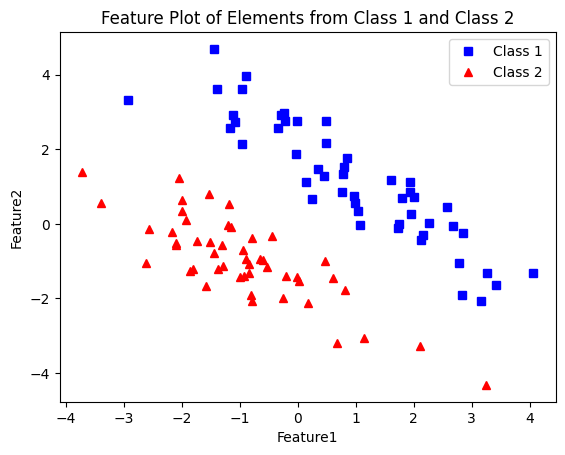

0


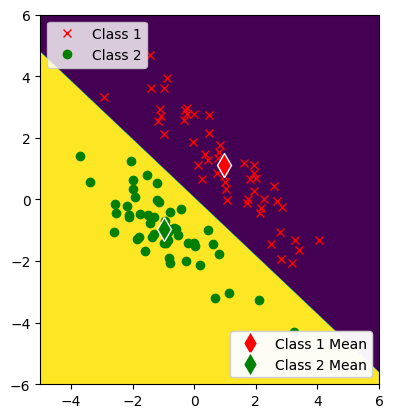

In [39]:
FeatureList = openFile("ee559_dataset/dataset1_train.csv")    ###
print(FeatureList)
result1 = just_data(FeatureList)    ###
#print(result1)
result2 = class_labels(FeatureList) 
#print(result2)
result3 = calculate_mean(FeatureList)  ###
#print(result3)
plot_data_2class(FeatureList)   ###
Train_Error_Rate = calculate_error(FeatureList)  ##
print(Train_Error_Rate)
plotDecBoundaries(result1,result2,result3)
 

In [40]:
TestList = openFile("ee559_dataset/dataset1_test.csv")
Train_Error_Rate = calculate_error(TestList)  ##
print(Train_Error_Rate)

0


['Class', '2.0', '2.0', '1.0', '2.0', '1.0', '2.0', '1.0', '2.0', '2.0', '2.0', '1.0', '1.0', '1.0', '1.0', '1.0', '2.0', '1.0', '2.0', '1.0', '1.0', '1.0', '1.0', '2.0', '1.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '1.0', '2.0', '2.0', '1.0', '1.0', '2.0', '2.0', '2.0', '2.0', '1.0', '2.0', '1.0', '2.0', '1.0', '1.0', '2.0', '2.0', '1.0', '1.0', '1.0', '1.0', '1.0', '2.0', '2.0', '1.0', '2.0', '2.0', '1.0', '2.0', '1.0', '1.0', '1.0', '2.0', '1.0', '2.0', '2.0', '2.0', '2.0', '1.0', '2.0', '2.0', '2.0', '1.0', '1.0', '1.0', '2.0', '1.0', '1.0', '2.0', '2.0', '2.0', '1.0', '2.0', '2.0', '1.0', '1.0', '1.0', '2.0', '2.0', '1.0', '1.0', '2.0', '1.0', '1.0', '1.0', '2.0', '1.0', '2.0', '1.0', '1.0']


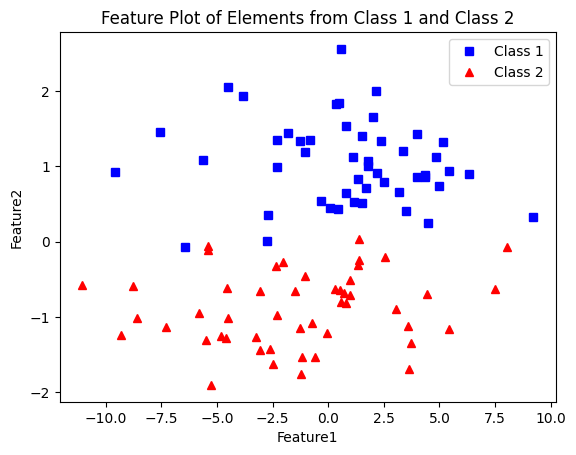

30.0


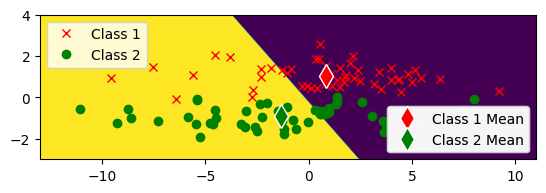

In [41]:
FeatureList = openFile("ee559_dataset/dataset2_train.csv")    ###
#print(FeatureList)
result1 = just_data(FeatureList)    ###
#print(result1)
result2 = class_labels(FeatureList) 
#print(result2)
result3 = calculate_mean(FeatureList)  ###
#print(result3)
plot_data_2class(FeatureList)   ###
Train_Error_Rate = calculate_error(FeatureList)  ##
print(Train_Error_Rate)
plotDecBoundaries(result1,result2,result3)
 

In [42]:
TestList = openFile("ee559_dataset/dataset2_test.csv")
Train_Error_Rate = calculate_error(TestList)  ##
print(Train_Error_Rate)

24.0


['Class', '2.0', '2.0', '2.0', '2.0', '1.0', '2.0', '2.0', '2.0', '2.0', '2.0', '1.0', '1.0', '1.0', '2.0', '2.0', '1.0', '1.0', '2.0', '1.0', '2.0', '2.0', '2.0', '1.0', '2.0', '1.0', '2.0', '1.0', '2.0', '2.0', '2.0', '2.0', '2.0', '1.0', '2.0', '2.0', '1.0', '1.0', '1.0', '2.0', '2.0', '1.0', '2.0', '1.0', '1.0', '2.0', '2.0', '1.0', '1.0', '2.0', '1.0', '2.0', '1.0', '1.0', '1.0', '2.0', '2.0', '2.0', '2.0', '1.0', '1.0', '1.0', '1.0', '1.0', '2.0', '1.0', '1.0', '1.0', '2.0', '1.0', '2.0', '1.0', '2.0', '2.0', '1.0', '1.0', '1.0', '2.0', '1.0', '1.0', '2.0', '1.0', '2.0', '2.0', '2.0', '2.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '2.0', '1.0', '1.0', '1.0', '2.0', '1.0', '2.0', '1.0', '2.0']


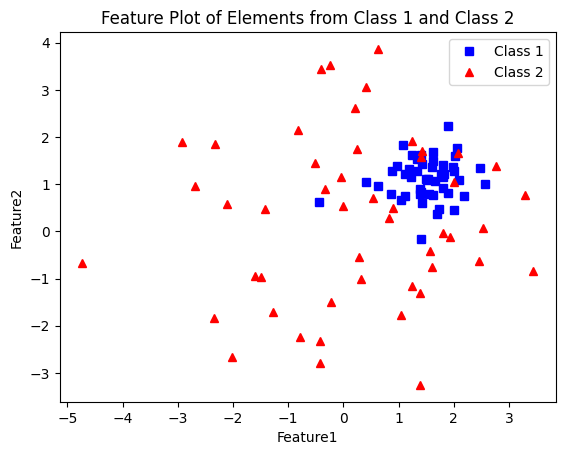

23.0


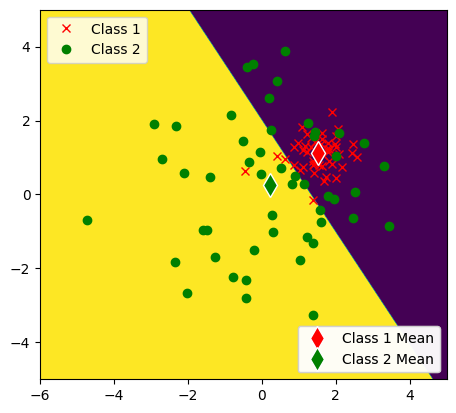

In [43]:
FeatureList = openFile("ee559_dataset/dataset3_train.csv")    ###
#print(FeatureList)
result1 = just_data(FeatureList)    ###
#print(result1)
result2 = class_labels(FeatureList) 
#print(result2)
result3 = calculate_mean(FeatureList)  ###
#print(result3)
plot_data_2class(FeatureList)   ###
Train_Error_Rate = calculate_error(FeatureList)  ##
print(Train_Error_Rate)
plotDecBoundaries(result1,result2,result3)
 

In [44]:
TestList = openFile("ee559_dataset/dataset3_test.csv")
Train_Error_Rate = calculate_error(TestList)  ##
print(Train_Error_Rate)

21.0


Ques 1 b):
1. Dataset 1:
   - Train error rate: 0%
   - Description: Data points are well-separated, leading to a clear decision boundary.
   - Conclusion: The classifier performs very well due to the distinct separability of data points.

2. Dataset 2:
   - Train error rate: 24%
   - Description: Data points are mixed and not as well-separated as Dataset 1.
   - Conclusion: The classifier struggles more with this dataset due to the increased overlap and proximity of data points from different classes.

3. Dataset 3:
   - Test error rate: 21%
   - Description: Similar to Dataset 2, data points are mixed and closely located to each other.
   - Conclusion: The classifier performs better than on Dataset 2 but still experiences a significant error rate due to the challenges posed by the data's arrangement.

Generally, classifiers perform better when data points are well-separated and the decision boundaries are clear, as in Dataset 1.
higher error rates.

['Class', '2.0', '1.0', '1.0', '2.0', '1.0', '2.0', '1.0', '1.0', '1.0', '1.0', '1.0', '2.0', '1.0', '1.0', '1.0', '2.0', '2.0', '1.0', '1.0', '2.0', '1.0', '2.0', '1.0', '1.0', '2.0', '2.0', '2.0', '1.0', '2.0', '1.0', '1.0', '1.0', '1.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '1.0', '1.0', '2.0', '2.0', '2.0', '2.0', '1.0', '1.0', '1.0', '2.0', '2.0', '2.0', '1.0', '1.0', '1.0', '2.0', '1.0', '1.0', '1.0', '1.0', '2.0', '2.0', '2.0', '1.0', '1.0', '2.0', '2.0', '1.0', '1.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '1.0', '2.0', '1.0', '1.0', '2.0', '2.0', '1.0', '2.0', '1.0', '2.0', '1.0', '1.0', '2.0', '2.0', '2.0', '1.0', '2.0', '1.0', '2.0', '1.0', '2.0', '2.0', '2.0', '1.0', '1.0', '1.0']


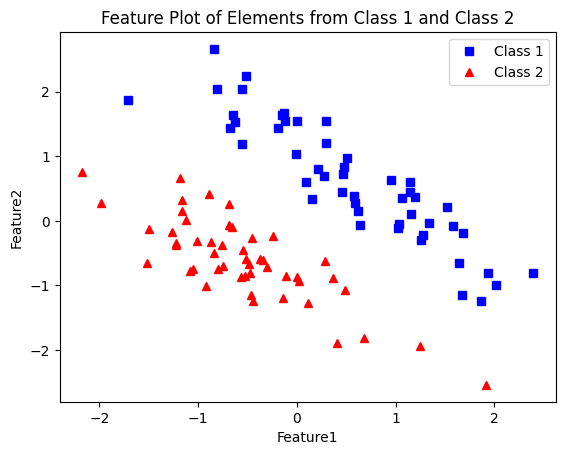

0


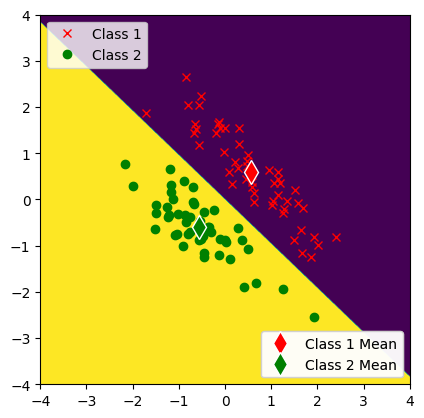

0


In [45]:
def normalizeData(FeatureList):
    # Extract features from the FeatureList
    features = [[float(x) for x in row] for row in FeatureList[1:]]
    
    # Extract the first row separately (not normalized)
    first_row = FeatureList[0][1:]
    
    # Transpose the features matrix to work on columns
    features_transposed = list(map(list, zip(*features)))
    
    # Normalize only the first and second columns
    for i in range(2):  # Loop over the first two columns
        feature_values = features_transposed[i]
        mean = sum(feature_values) / len(feature_values)
        variance = sum((x - mean) ** 2 for x in feature_values) / len(feature_values)
        std_dev = variance ** 0.5
    
        # Normalize the feature
        features_transposed[i] = [(x - mean) / std_dev for x in feature_values]
    
    # Transpose the features back to rows
    normalized_features = list(map(list, zip(*features_transposed)))
    
    # Update FeatureList with normalized features for the first and second columns
    FeatureList[1:] = [normalized_features[i] + [row[2]] for i, row in enumerate(FeatureList[1:])]
    
    # Restore the first row to the updated FeatureList
    FeatureList[0][1:] = first_row
    
    return FeatureList
    
FeatureList = openFile("ee559_dataset/dataset1_train.csv")    ###
normalizedData = normalizeData(FeatureList)
#print(FeatureList)
result1 = just_data(normalizedData)    ###
#print(result1)
result2 = class_labels(normalizedData) 
#print(result2)
result3 = calculate_mean(normalizedData)  ###
#print(result3)
plot_data_2class(normalizedData)   ###
Train_Error_Rate = calculate_error(normalizedData)  ##
print(Train_Error_Rate)
plotDecBoundaries(result1,result2,result3)

FeatureList = openFile("ee559_dataset/dataset1_test.csv")   ###
normalizedData = normalizeData(FeatureList)
#result3 = calculate_mean(normalizedData)  ###
Train_Error_Rate = calculate_error(normalizedData)  ##
print(Train_Error_Rate)



['Class', '2.0', '2.0', '1.0', '2.0', '1.0', '2.0', '1.0', '2.0', '2.0', '2.0', '1.0', '1.0', '1.0', '1.0', '1.0', '2.0', '1.0', '2.0', '1.0', '1.0', '1.0', '1.0', '2.0', '1.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '1.0', '2.0', '2.0', '1.0', '1.0', '2.0', '2.0', '2.0', '2.0', '1.0', '2.0', '1.0', '2.0', '1.0', '1.0', '2.0', '2.0', '1.0', '1.0', '1.0', '1.0', '1.0', '2.0', '2.0', '1.0', '2.0', '2.0', '1.0', '2.0', '1.0', '1.0', '1.0', '2.0', '1.0', '2.0', '2.0', '2.0', '2.0', '1.0', '2.0', '2.0', '2.0', '1.0', '1.0', '1.0', '2.0', '1.0', '1.0', '2.0', '2.0', '2.0', '1.0', '2.0', '2.0', '1.0', '1.0', '1.0', '2.0', '2.0', '1.0', '1.0', '2.0', '1.0', '1.0', '1.0', '2.0', '1.0', '2.0', '1.0', '1.0']


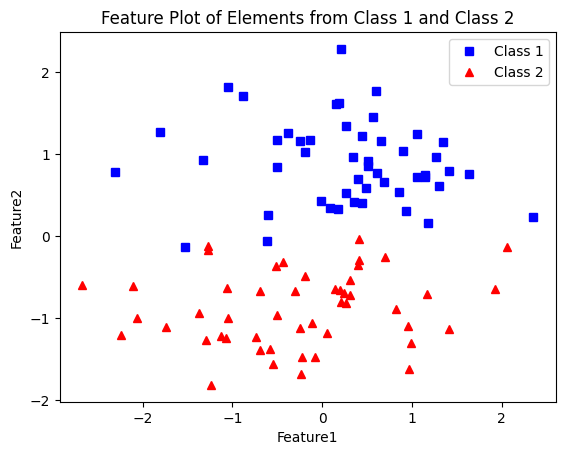

4.0


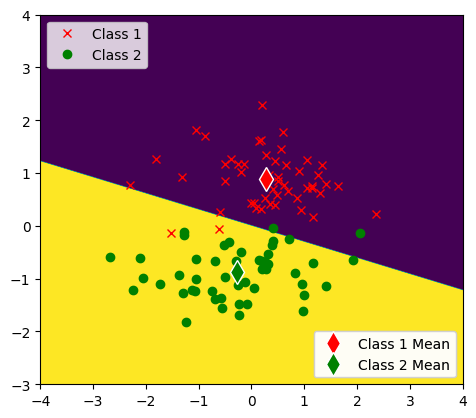

4.0


In [46]:
FeatureList = openFile("ee559_dataset/dataset2_train.csv")    ###
normalizedData = normalizeData(FeatureList)
#print(FeatureList)
result1 = just_data(normalizedData)    ###
#print(result1)
result2 = class_labels(normalizedData) 
#print(result2)
result3 = calculate_mean(normalizedData)  ###
#print(result3)
plot_data_2class(normalizedData)   ###
Train_Error_Rate = calculate_error(normalizedData)  ##
print(Train_Error_Rate)
plotDecBoundaries(result1,result2,result3)

FeatureList = openFile("ee559_dataset/dataset2_test.csv")   ###
normalizedData = normalizeData(FeatureList)
#result3 = calculate_mean(normalizedData)  ###
Train_Error_Rate = calculate_error(normalizedData)  ##
print(Train_Error_Rate)

['Class', '2.0', '2.0', '2.0', '2.0', '1.0', '2.0', '2.0', '2.0', '2.0', '2.0', '1.0', '1.0', '1.0', '2.0', '2.0', '1.0', '1.0', '2.0', '1.0', '2.0', '2.0', '2.0', '1.0', '2.0', '1.0', '2.0', '1.0', '2.0', '2.0', '2.0', '2.0', '2.0', '1.0', '2.0', '2.0', '1.0', '1.0', '1.0', '2.0', '2.0', '1.0', '2.0', '1.0', '1.0', '2.0', '2.0', '1.0', '1.0', '2.0', '1.0', '2.0', '1.0', '1.0', '1.0', '2.0', '2.0', '2.0', '2.0', '1.0', '1.0', '1.0', '1.0', '1.0', '2.0', '1.0', '1.0', '1.0', '2.0', '1.0', '2.0', '1.0', '2.0', '2.0', '1.0', '1.0', '1.0', '2.0', '1.0', '1.0', '2.0', '1.0', '2.0', '2.0', '2.0', '2.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '2.0', '1.0', '1.0', '1.0', '2.0', '1.0', '2.0', '1.0', '2.0']


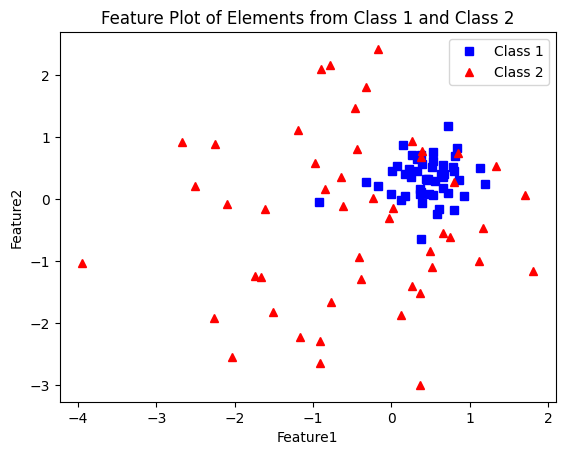

22.0


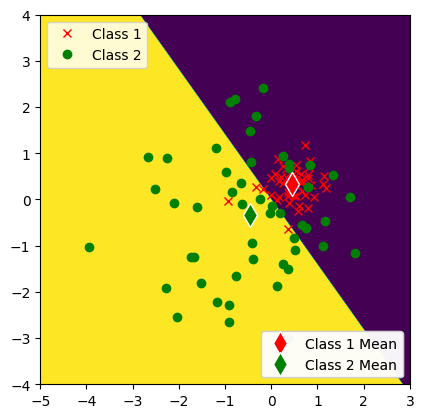

In [47]:
FeatureList = openFile("ee559_dataset/dataset3_train.csv")    ###
normalizedData = normalizeData(FeatureList)
#print(FeatureList)
result1 = just_data(normalizedData)    ###
#print(result1)
result2 = class_labels(normalizedData) 
#print(result2)
result3 = calculate_mean(normalizedData)  ###
#print(result3)
plot_data_2class(normalizedData)   ###
Train_Error_Rate = calculate_error(normalizedData)  ##
print(Train_Error_Rate)
plotDecBoundaries(result1,result2,result3)

In [48]:



FeatureList = openFile("ee559_dataset/dataset3_test.csv")   ###
normalizedData = normalizeData(FeatureList)
#result3 = calculate_mean(normalizedData)  ###
Train_Error_Rate = calculate_error(normalizedData)  ##
print(Train_Error_Rate)


20.0


Ques 1 d):
1. **Dataset 1**:
   - Earlier error rate: 0%
   - With normalized data: 0%
   - Description: The error rate remains unchanged after normalization. This suggests that the data might have already been well-distributed and scaled properly, so normalization didn't significantly impact the performance.
    
2. **Dataset 2**:
   - Earlier error rate: 24%
   - With normalized data: 4%
   - Description: There's a significant improvement in the error rate after normalizing the data. Normalization likely helped in aligning the features properly and mitigated the issues caused by varying scales or distributions among features. This improvement indicates that the classifier could better discern patterns in the normalized data.
   
3. **Dataset 3**:
   - Earlier error rate: 21%
   - With normalized data: 21% 
   - Description: The error rate remains the same after normalization. This suggests that normalization didn't have a notable effect on the performance of the classifier. It's possible that the data distribution and scale were already conducive to effective classification, or the normalization method used didn't address the specific challenges present in the dataset.
higher error rates.

In [49]:
def mean_3class(FeatureList):
#Calculate the mean 
    FeatureList1 = []
    FeatureList2 = []
    FeatureList3 = []

    #Divide the training data into two separate lists based on their class 
    #print(FeatureList[-1])
    for i in FeatureList[1:]:
        #print(i)
        if float(i[-1]) == 1:
            FeatureList1.append(i)
        elif float(i[-1]) == 2:
            FeatureList2.append(i)
        else:
            FeatureList3.append(i)
    Sum1 = 0
    Sum2 = 0
    Sum3 = 0
    Sum4 = 0
    Sum5 = 0
    Sum6 = 0
    count1 = 0
    count2 = 0
    count3 = 0

    for i in FeatureList1:
        #print(i)
        Sum1 = Sum1 + float(i[0]) 
        Sum2 = Sum2 + float(i[1]) 
        count1 = count1 + 1
    
    for i in FeatureList2:
        Sum3 = Sum3 + float(i[0]) 
        Sum4 = Sum4 + float(i[1]) 
        count2 = count2 + 1
        
    for i in FeatureList3:
        Sum5 = Sum5 + float(i[0]) 
        Sum6 = Sum6 + float(i[1]) 
        count3 = count3 + 1
    
    Mean1 = Sum1/count1 
    Mean2 = Sum2/count1 
    Mean3 = Sum3/count2 
    Mean4 = Sum4/count2
    Mean5 = Sum5/count3
    Mean6 = Sum6/count3
    
    
    Mean = [[Mean1,Mean2],[Mean3,Mean4], [Mean5, Mean6]] 
    #print(Mean)
    
    result3 = np.array(Mean).astype("float")
    return result3
    #print(result3)
    
def plot_data_3class(FeatureList):
    FeatureList1 = []
    FeatureList2 = []
    FeatureList3 = []

    #Divide the training data into two separate lists based on their class 
    #print(FeatureList[-1])
    for i in FeatureList[1:]:
        if float(i[-1]) == 1:
            FeatureList1.append(i)
        elif float(i[-1]) == 2:
            FeatureList2.append(i)
        else:
            FeatureList3.append(i)
            
    x_class1 = [float(x[0]) for x in FeatureList1[1:]]
    y_class1 = [float(x[1]) for x in FeatureList1[1:]]
    
    x_class2 = [float(x[0]) for x in FeatureList2[1:]]
    y_class2 = [float(x[1]) for x in FeatureList2[1:]]

    x_class3 = [float(x[0]) for x in FeatureList3[1:]]
    y_class3 = [float(x[1]) for x in FeatureList3[1:]]
    
    # Plot points from class 1 with blue squares
    plt.plot(x_class1, y_class1, 'bs', label='Class 1')
    
    # Plot points from class 2 with red triangles
    plt.plot(x_class2, y_class2, 'r^', label='Class 2')

    plt.plot(x_class3, y_class3, 'go', label='Class 3')
    
    plt.xlabel('Feature1')
    plt.ylabel('Feature2')
    plt.title('Feature Plot of Elements from Class 1 and Class 2')
    plt.legend()
    plt.show()

    



['Class', '3.0', '2.0', '1.0', '1.0', '1.0', '1.0', '2.0', '3.0', '1.0', '3.0', '3.0', '3.0', '2.0', '3.0', '1.0', '3.0', '2.0', '3.0', '3.0', '2.0', '2.0', '3.0', '3.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '3.0', '2.0', '1.0', '3.0', '3.0', '3.0', '2.0', '2.0', '2.0', '3.0', '3.0', '2.0', '3.0', '2.0', '2.0', '2.0', '3.0', '2.0', '1.0', '2.0', '1.0', '2.0', '1.0', '1.0', '3.0', '2.0', '1.0', '1.0', '3.0', '1.0', '2.0', '1.0', '2.0', '2.0', '3.0', '2.0', '2.0', '2.0', '2.0', '2.0', '3.0', '1.0', '1.0', '3.0', '1.0', '2.0', '3.0', '2.0', '3.0', '3.0', '1.0', '3.0', '2.0', '1.0', '2.0', '1.0', '3.0', '2.0', '3.0', '2.0', '1.0', '3.0', '3.0', '1.0', '2.0', '2.0', '2.0', '3.0', '1.0', '1.0', '3.0', '2.0', '3.0', '3.0', '1.0', '3.0', '2.0', '1.0', '1.0', '3.0', '3.0', '2.0', '3.0', '1.0', '2.0', '1.0', '2.0', '3.0', '1.0', '1.0', '2.0', '1.0', '2.0', '2.0', '1.0', '3.0', '1.0', '1.0', '2.0', '2.0', '1.0', '3.0', '1.0', '1.0', '1.0', '3.0', '2.0', '3.0', '3.0', '1.0', '3.0', '2.0', '2.

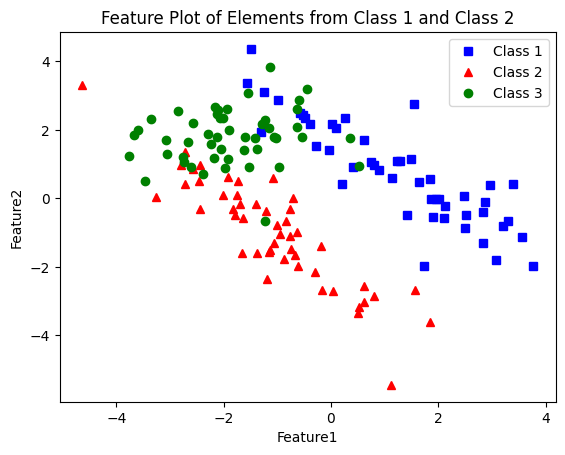

16.666666666666664


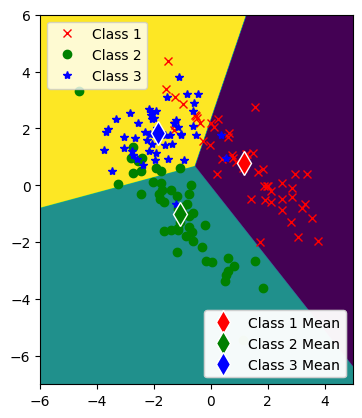

In [50]:
FeatureList = openFile("ee559_dataset/dataset4_train.csv")   #3-class
result1 = just_data(FeatureList)    ###
#print(result1)
result2 = class_labels(FeatureList)
result3 = mean_3class(FeatureList)  ###
#print(result3)
plot_data_3class(FeatureList)   ###
Train_Error_Rate = calculate_error_3class(FeatureList)  ##
print(Train_Error_Rate)
plotDecBoundaries(result1,result2,result3)

In [51]:
TestList = openFile("ee559_dataset/dataset4_test.csv")
Train_Error_Rate = calculate_error_3class(TestList)  ##
print(Train_Error_Rate)

13.333333333333334


['Class', '3.0', '3.0', '3.0', '3.0', '1.0', '3.0', '3.0', '2.0', '1.0', '3.0', '2.0', '1.0', '1.0', '3.0', '1.0', '3.0', '3.0', '2.0', '1.0', '1.0', '1.0', '3.0', '3.0', '3.0', '2.0', '3.0', '3.0', '2.0', '3.0', '3.0', '2.0', '2.0', '1.0', '3.0', '2.0', '3.0', '1.0', '1.0', '2.0', '2.0', '1.0', '3.0', '2.0', '1.0', '2.0', '2.0', '2.0', '3.0', '1.0', '2.0', '2.0', '1.0', '3.0', '1.0', '2.0', '1.0', '2.0', '1.0', '1.0', '2.0', '2.0', '1.0', '2.0', '1.0', '1.0', '2.0', '2.0', '3.0', '3.0', '2.0', '1.0', '3.0', '1.0', '2.0', '3.0', '2.0', '1.0', '3.0', '3.0', '3.0', '1.0', '2.0', '2.0', '1.0', '3.0', '1.0', '1.0', '2.0', '3.0', '1.0', '2.0', '2.0', '2.0', '3.0', '1.0', '1.0', '3.0', '3.0', '3.0', '1.0', '2.0', '2.0', '1.0', '2.0', '1.0', '1.0', '3.0', '2.0', '3.0', '1.0', '1.0', '3.0', '1.0', '3.0', '1.0', '3.0', '1.0', '1.0', '2.0', '2.0', '2.0', '3.0', '3.0', '1.0', '2.0', '3.0', '3.0', '2.0', '2.0', '3.0', '2.0', '1.0', '1.0', '2.0', '2.0', '3.0', '2.0', '1.0', '1.0', '1.0', '2.0', '3.

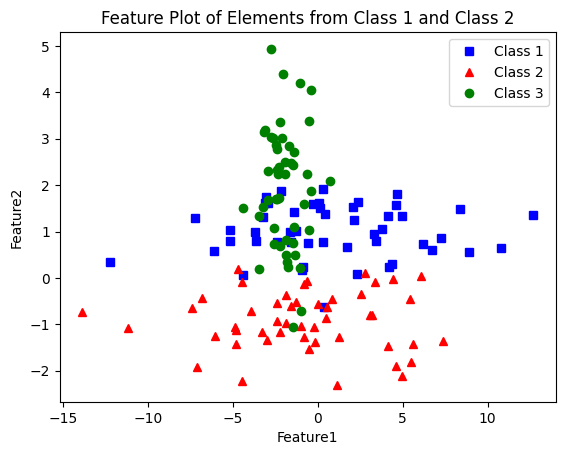

35.333333333333336


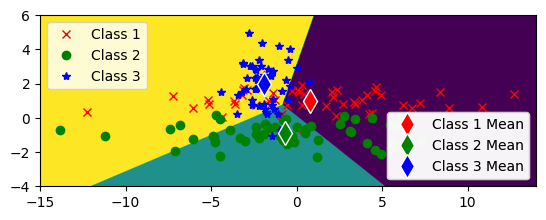

In [52]:
FeatureList = openFile("ee559_dataset/dataset5_train.csv")   #3-class
result1 = just_data(FeatureList)    ###
#print(result1)
result2 = class_labels(FeatureList)
result3 = mean_3class(FeatureList)  ###
#print(result3)
plot_data_3class(FeatureList)   ###
Train_Error_Rate = calculate_error_3class(FeatureList)  ##
print(Train_Error_Rate)
plotDecBoundaries(result1,result2,result3)

In [53]:
TestList = openFile("ee559_dataset/dataset5_test.csv")
Train_Error_Rate = calculate_error_3class(TestList)  ##
print(Train_Error_Rate)

22.0


['Class', '2.0', '2.0', '2.0', '1.0', '3.0', '2.0', '2.0', '1.0', '3.0', '1.0', '1.0', '1.0', '1.0', '3.0', '3.0', '2.0', '1.0', '3.0', '3.0', '2.0', '1.0', '1.0', '1.0', '3.0', '3.0', '1.0', '3.0', '1.0', '3.0', '2.0', '3.0', '1.0', '1.0', '1.0', '3.0', '2.0', '3.0', '3.0', '1.0', '3.0', '2.0', '2.0', '3.0', '3.0', '3.0', '2.0', '1.0', '2.0', '3.0', '2.0', '3.0', '2.0', '1.0', '3.0', '1.0', '3.0', '2.0', '1.0', '1.0', '3.0', '2.0', '3.0', '3.0', '1.0', '3.0', '2.0', '3.0', '1.0', '1.0', '2.0', '2.0', '2.0', '1.0', '2.0', '3.0', '3.0', '1.0', '2.0', '2.0', '2.0', '3.0', '2.0', '3.0', '3.0', '1.0', '3.0', '1.0', '3.0', '2.0', '2.0', '3.0', '3.0', '1.0', '3.0', '3.0', '2.0', '2.0', '2.0', '2.0', '2.0', '1.0', '1.0', '3.0', '1.0', '1.0', '3.0', '1.0', '1.0', '3.0', '2.0', '1.0', '3.0', '3.0', '2.0', '3.0', '2.0', '1.0', '2.0', '1.0', '2.0', '2.0', '2.0', '2.0', '1.0', '3.0', '1.0', '2.0', '2.0', '3.0', '1.0', '1.0', '3.0', '1.0', '2.0', '2.0', '3.0', '1.0', '2.0', '2.0', '1.0', '3.0', '1.

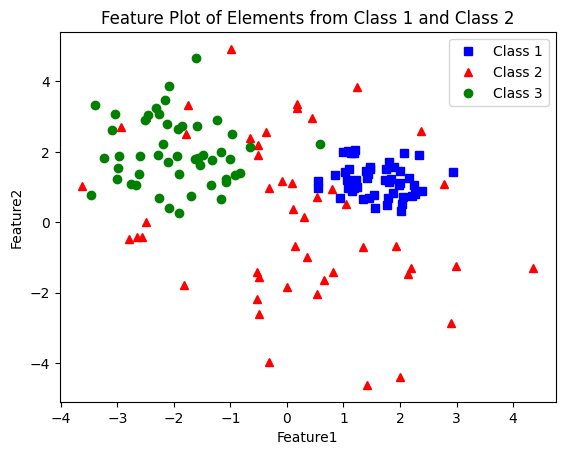

19.333333333333332


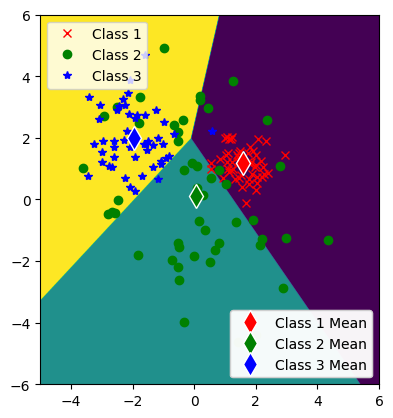

In [54]:
FeatureList = openFile("ee559_dataset/dataset6_train.csv")   #3-class
result1 = just_data(FeatureList)    ###
#print(result1)
result2 = class_labels(FeatureList)
result3 = mean_3class(FeatureList)  ###
#print(result3)
plot_data_3class(FeatureList)   ###
Train_Error_Rate = calculate_error_3class(FeatureList)  ##
print(Train_Error_Rate)
plotDecBoundaries(result1,result2,result3)

In [55]:
TestList = openFile("ee559_dataset/dataset6_test.csv")
Train_Error_Rate = calculate_error_3class(TestList)  ##
print(Train_Error_Rate)

24.0


Ques 1 b):

The training error rates on the last 3 datasets are 16.667, 35.333 and 19.333 % respectively.1. **Dataset 4:**
   - Test error rate: 13.333%
   - Description: Generalized our classifier considerably.

2. **Dataset 5:**
   - Train error rate: 22%
   - Description: Data points are mixed and not as well-separated.

3. **Dataset 6:**
   - Test error rate: 24%
   - Description: Too many outliers in the testing data of dataset 6 which leads to less generalization of the model for unseen data. Here, the model might have undergone underfitting.
ies are clear. 


['Class', '3.0', '2.0', '1.0', '1.0', '1.0', '1.0', '2.0', '3.0', '1.0', '3.0', '3.0', '3.0', '2.0', '3.0', '1.0', '3.0', '2.0', '3.0', '3.0', '2.0', '2.0', '3.0', '3.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '3.0', '2.0', '1.0', '3.0', '3.0', '3.0', '2.0', '2.0', '2.0', '3.0', '3.0', '2.0', '3.0', '2.0', '2.0', '2.0', '3.0', '2.0', '1.0', '2.0', '1.0', '2.0', '1.0', '1.0', '3.0', '2.0', '1.0', '1.0', '3.0', '1.0', '2.0', '1.0', '2.0', '2.0', '3.0', '2.0', '2.0', '2.0', '2.0', '2.0', '3.0', '1.0', '1.0', '3.0', '1.0', '2.0', '3.0', '2.0', '3.0', '3.0', '1.0', '3.0', '2.0', '1.0', '2.0', '1.0', '3.0', '2.0', '3.0', '2.0', '1.0', '3.0', '3.0', '1.0', '2.0', '2.0', '2.0', '3.0', '1.0', '1.0', '3.0', '2.0', '3.0', '3.0', '1.0', '3.0', '2.0', '1.0', '1.0', '3.0', '3.0', '2.0', '3.0', '1.0', '2.0', '1.0', '2.0', '3.0', '1.0', '1.0', '2.0', '1.0', '2.0', '2.0', '1.0', '3.0', '1.0', '1.0', '2.0', '2.0', '1.0', '3.0', '1.0', '1.0', '1.0', '3.0', '2.0', '3.0', '3.0', '1.0', '3.0', '2.0', '2.

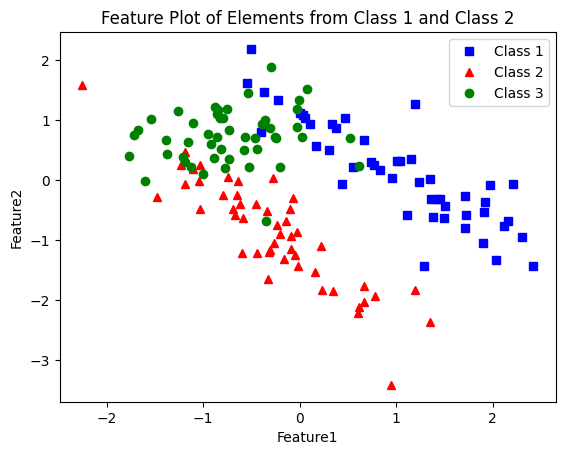

16.666666666666664


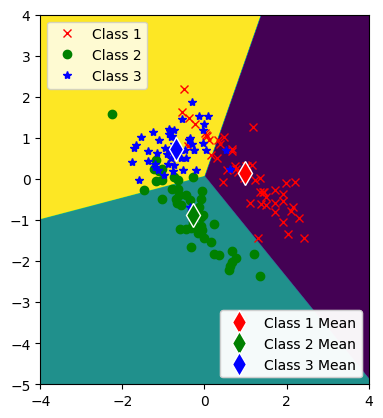

12.666666666666668


In [56]:
FeatureList = openFile("ee559_dataset/dataset4_train.csv")   #3-class
normalizedData = normalizeData(FeatureList)
result1 = just_data(FeatureList) ###
#print(result1)
result2 = class_labels(FeatureList)
result3 = mean_3class(FeatureList)  ###
#print(result3)
plot_data_3class(FeatureList)   ###
Train_Error_Rate = calculate_error_3class(FeatureList)  ##
print(Train_Error_Rate)
plotDecBoundaries(result1,result2,result3)

FeatureList = openFile("ee559_dataset/dataset4_test.csv")   ###
normalizedData = normalizeData(FeatureList)
Train_Error_Rate = calculate_error_3class(normalizedData)  ##
print(Train_Error_Rate)


['Class', '3.0', '3.0', '3.0', '3.0', '1.0', '3.0', '3.0', '2.0', '1.0', '3.0', '2.0', '1.0', '1.0', '3.0', '1.0', '3.0', '3.0', '2.0', '1.0', '1.0', '1.0', '3.0', '3.0', '3.0', '2.0', '3.0', '3.0', '2.0', '3.0', '3.0', '2.0', '2.0', '1.0', '3.0', '2.0', '3.0', '1.0', '1.0', '2.0', '2.0', '1.0', '3.0', '2.0', '1.0', '2.0', '2.0', '2.0', '3.0', '1.0', '2.0', '2.0', '1.0', '3.0', '1.0', '2.0', '1.0', '2.0', '1.0', '1.0', '2.0', '2.0', '1.0', '2.0', '1.0', '1.0', '2.0', '2.0', '3.0', '3.0', '2.0', '1.0', '3.0', '1.0', '2.0', '3.0', '2.0', '1.0', '3.0', '3.0', '3.0', '1.0', '2.0', '2.0', '1.0', '3.0', '1.0', '1.0', '2.0', '3.0', '1.0', '2.0', '2.0', '2.0', '3.0', '1.0', '1.0', '3.0', '3.0', '3.0', '1.0', '2.0', '2.0', '1.0', '2.0', '1.0', '1.0', '3.0', '2.0', '3.0', '1.0', '1.0', '3.0', '1.0', '3.0', '1.0', '3.0', '1.0', '1.0', '2.0', '2.0', '2.0', '3.0', '3.0', '1.0', '2.0', '3.0', '3.0', '2.0', '2.0', '3.0', '2.0', '1.0', '1.0', '2.0', '2.0', '3.0', '2.0', '1.0', '1.0', '1.0', '2.0', '3.

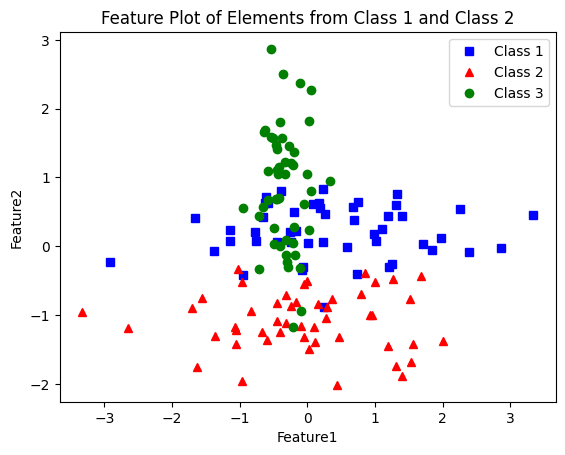

24.0


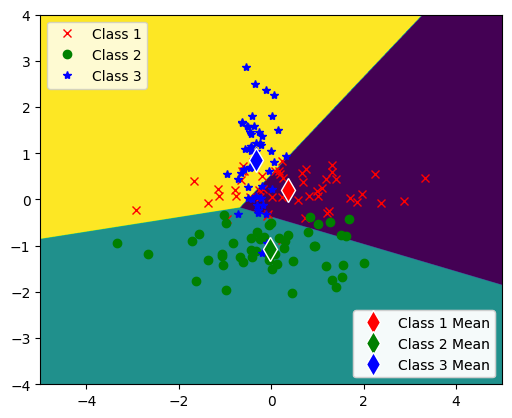

10.666666666666668


In [57]:
FeatureList = openFile("ee559_dataset/dataset5_train.csv")   #3-class
normalizedData = normalizeData(FeatureList)
result1 = just_data(FeatureList) ###
#print(result1)
result2 = class_labels(FeatureList)
result3 = mean_3class(FeatureList)  ###
#print(result3)
plot_data_3class(FeatureList)   ###
Train_Error_Rate = calculate_error_3class(FeatureList)  ##
print(Train_Error_Rate)
plotDecBoundaries(result1,result2,result3)

FeatureList = openFile("ee559_dataset/dataset5_test.csv")   ###
normalizedData = normalizeData(FeatureList)
Train_Error_Rate = calculate_error_3class(normalizedData)  ##
print(Train_Error_Rate)

['Class', '2.0', '2.0', '2.0', '1.0', '3.0', '2.0', '2.0', '1.0', '3.0', '1.0', '1.0', '1.0', '1.0', '3.0', '3.0', '2.0', '1.0', '3.0', '3.0', '2.0', '1.0', '1.0', '1.0', '3.0', '3.0', '1.0', '3.0', '1.0', '3.0', '2.0', '3.0', '1.0', '1.0', '1.0', '3.0', '2.0', '3.0', '3.0', '1.0', '3.0', '2.0', '2.0', '3.0', '3.0', '3.0', '2.0', '1.0', '2.0', '3.0', '2.0', '3.0', '2.0', '1.0', '3.0', '1.0', '3.0', '2.0', '1.0', '1.0', '3.0', '2.0', '3.0', '3.0', '1.0', '3.0', '2.0', '3.0', '1.0', '1.0', '2.0', '2.0', '2.0', '1.0', '2.0', '3.0', '3.0', '1.0', '2.0', '2.0', '2.0', '3.0', '2.0', '3.0', '3.0', '1.0', '3.0', '1.0', '3.0', '2.0', '2.0', '3.0', '3.0', '1.0', '3.0', '3.0', '2.0', '2.0', '2.0', '2.0', '2.0', '1.0', '1.0', '3.0', '1.0', '1.0', '3.0', '1.0', '1.0', '3.0', '2.0', '1.0', '3.0', '3.0', '2.0', '3.0', '2.0', '1.0', '2.0', '1.0', '2.0', '2.0', '2.0', '2.0', '1.0', '3.0', '1.0', '2.0', '2.0', '3.0', '1.0', '1.0', '3.0', '1.0', '2.0', '2.0', '3.0', '1.0', '2.0', '2.0', '1.0', '3.0', '1.

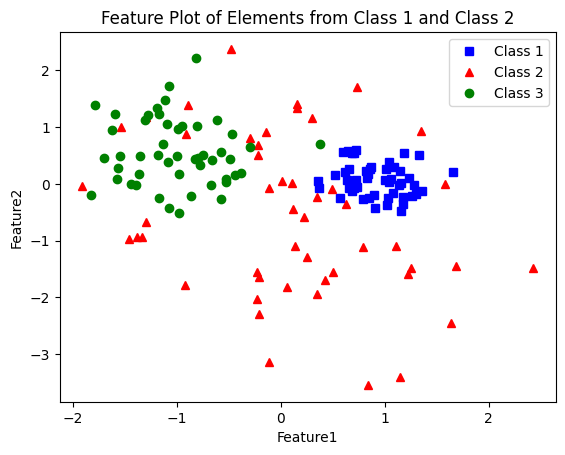

15.333333333333332


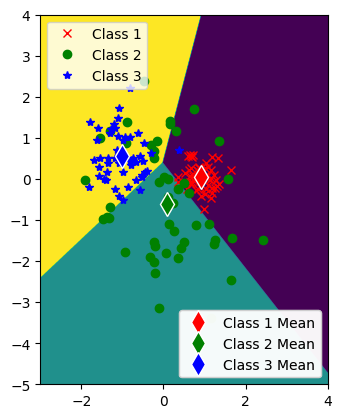

25.333333333333336


In [58]:
FeatureList = openFile("ee559_dataset/dataset6_train.csv")   #3-class
normalizedData = normalizeData(FeatureList)
result1 = just_data(FeatureList) ###
#print(result1)
result2 = class_labels(FeatureList)
result3 = mean_3class(FeatureList)  ###
#print(result3)
plot_data_3class(FeatureList)   ###
Train_Error_Rate = calculate_error_3class(FeatureList)  ##
print(Train_Error_Rate)
plotDecBoundaries(result1,result2,result3)

FeatureList = openFile("ee559_dataset/dataset6_test.csv")   ###
normalizedData = normalizeData(FeatureList)
Train_Error_Rate = calculate_error_3class(normalizedData)  ##
print(Train_Error_Rate)

Ques 1 d: Z-score normalization (Normalization with mean = 0 and sample variance = 1) is applied.
- Z-score normalization, also known as Z-score standardization, is chosen due to its ability to handle outliers effectively.
- The training set error rates observed after normalization are as follows:
  1. 16.667%
  2. 24%
  3. 15.33%
- The normalized training sets exhibit lower error rates compared to the unnormalized sets:
  1. Unnormalized: 16.667%, 35.333%, 19.333%
- The test sets demonstrate improved performance after normalization:
  1. Error rates for test sets: 12.667%, 10.667%, 25.33%
- Despite normalization, the presence of outliers still impacts the classification accuracy, particularly noticeable in the 6th testing dataset.
- Normalizing the feature set and standardizing it enhances the classifier's accuracy considerably on both training and test sets.
t in the dataset.
